In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
import pandas as pd

customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transactions.csv')

data = pd.merge(transactions, customers, on='CustomerID')

customer_features = data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
).reset_index()

customer_profile = pd.merge(customer_features, customers, on='CustomerID')

# Convert Region into numeric using one-hot encoding (if categorical)
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

customer_profile = customer_profile.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile)

In [14]:
inertia = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

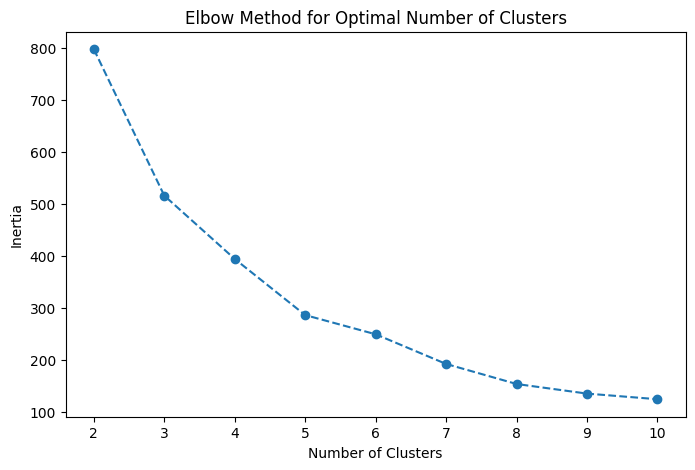

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

In [18]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0341789785355977


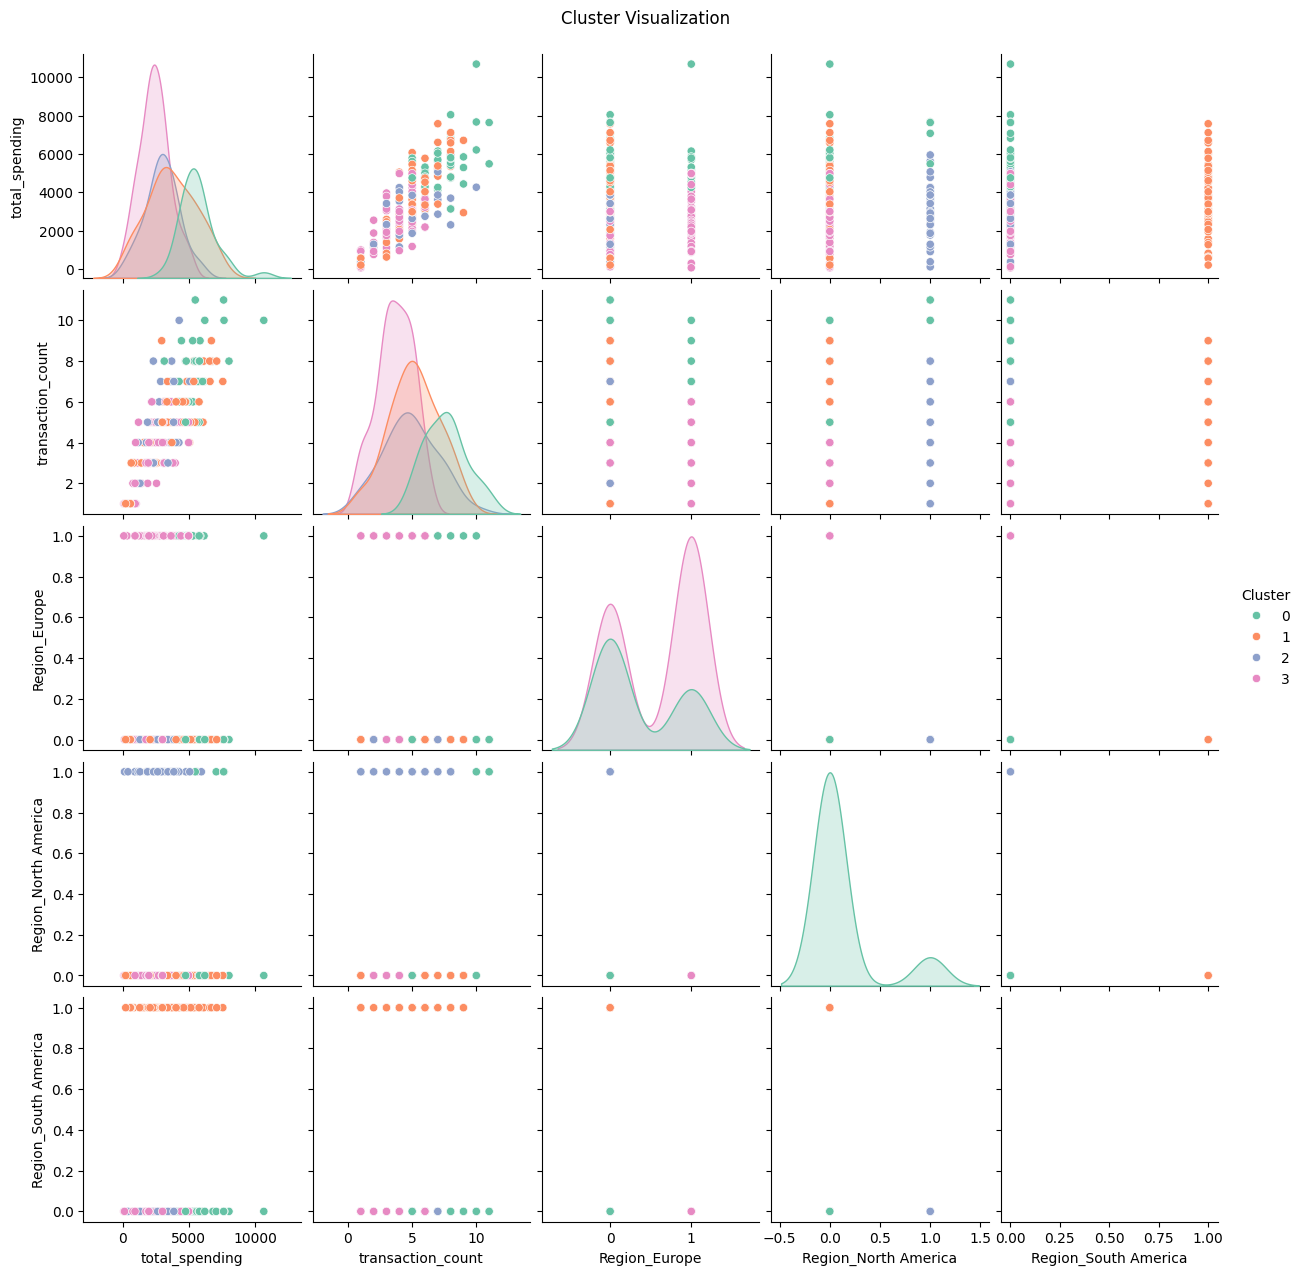

In [19]:
sns.pairplot(customer_profile, hue='Cluster', palette='Set2')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette = silhouette_score(scaled_data, customer_profile['Cluster'])
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.4093918327159413


In [20]:
customer_profile.to_csv('Customer_Clusters.csv', index=False)